
¡Hola, Arnold!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos
df_companies = pd.read_csv("/datasets/project_sql_result_01.csv")
df_locations = pd.read_csv("/datasets/project_sql_result_04.csv")


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
# Verificar estructura y tipos de datos
print(df_companies.info())
print(df_companies.head())

print(df_locations.info())
print(df_locations.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
  dropoff_loca

In [4]:
# Convertir trips_amount y average_trips a enteros o float si no lo están
df_companies['trips_amount'] = pd.to_numeric(df_companies['trips_amount'], errors='coerce')
df_locations['average_trips'] = pd.to_numeric(df_locations['average_trips'], errors='coerce')


In [5]:
top_10_locations = df_locations.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_locations)


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


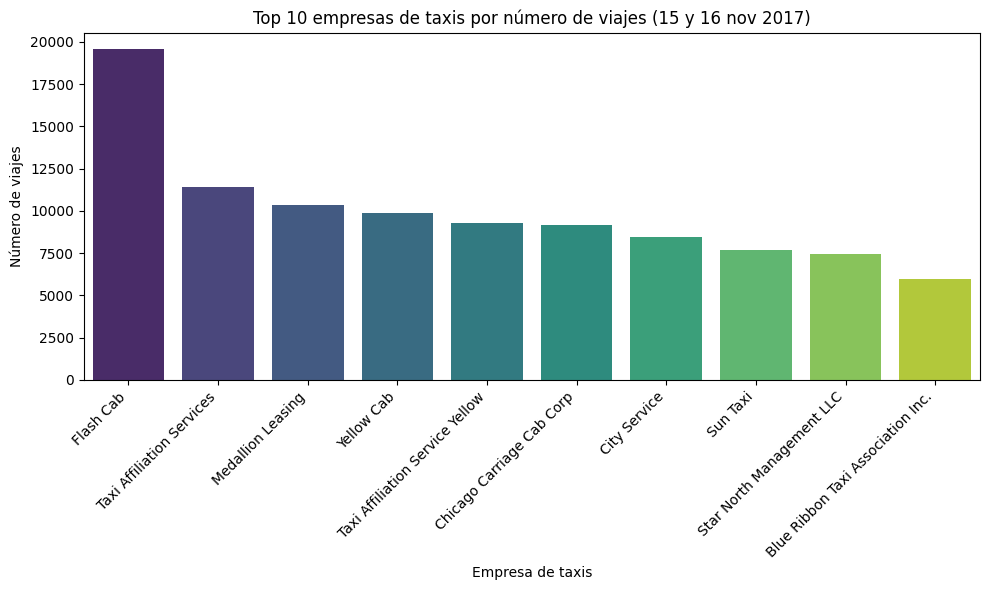

In [6]:
# Ordenar y seleccionar el top 10
top_10 = df_companies.sort_values('trips_amount', ascending=False).head(10)

# Gráfica
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='company_name', y='trips_amount', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 empresas de taxis por número de viajes (15 y 16 nov 2017)')
plt.xlabel('Empresa de taxis')
plt.ylabel('Número de viajes')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el desarrollo de la gráfica para visualizar los resultados. Solamente dado que al cliente le interesa el top 10 de las principales empresas con número de viajes, te recomiendo complementar este análisis con una gráfica solamente mostrando el top 10.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

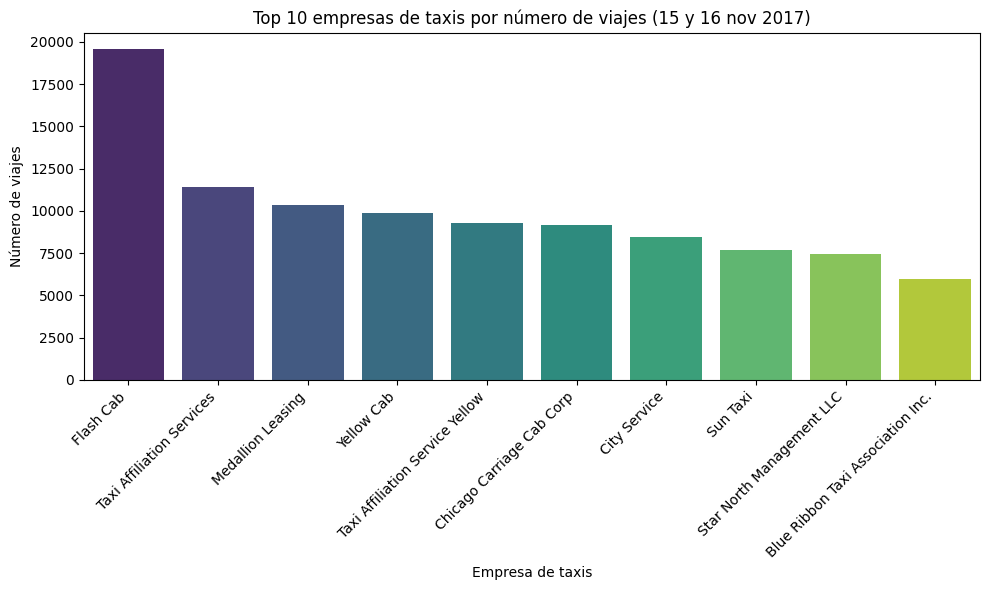

In [7]:
# Ordenar y seleccionar el top 10
top_10 = df_companies.sort_values('trips_amount', ascending=False).head(10)

# Gráfica
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='company_name', y='trips_amount', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 empresas de taxis por número de viajes (15 y 16 nov 2017)')
plt.xlabel('Empresa de taxis')
plt.ylabel('Número de viajes')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

**Conclusiones sobre empresas de taxis:**
- Flash Cab y Taxi Affiliation Services fueron las más populares el 15 y 16 de noviembre.
- Algunas compañías tienen una presencia significativamente menor, indicando menor volumen o cobertura geográfica.

**Conclusiones sobre los barrios:**
- Loop destaca como el barrio con más finalizaciones de viaje en promedio durante noviembre.
- Barrios como River North y Streeterville también tienen un alto número de finalizaciones, lo cual puede indicar una alta actividad comercial o turística en esas zonas.

**Planteamiento de la hipótesis**
Queremos saber si los sábados con lluvia o tormenta ("Bad") tienen una duración promedio distinta en los viajes desde el Loop hasta O’Hare, en comparación con los sábados con clima normal ("Good").

**Hipótesis nula (H₀):**
La duración promedio de los viajes los sábados lluviosos y no lluviosos es igual.


𝜇
Good
μ 
Bad
​
 =μ 
Good
​
 

**Hipótesis alternativa (H₁):**
La duración promedio de los viajes los sábados lluviosos y no lluviosos es diferente.


𝜇
Bad
≠
𝜇
Good
μ 
Bad
​
 



In [8]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('/datasets/project_sql_result_07.csv', parse_dates=['start_ts'])
print(df.head())


             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0


In [9]:
# Asegurarse de que start_ts es datetime
df['start_ts'] = pd.to_datetime(df['start_ts'])

# Filtrar solo los sábados
df_saturdays = df[df['start_ts'].dt.dayofweek == 5]  # 5 = sábado

# Dividir por condiciones climáticas
group_good = df_saturdays[df_saturdays['weather_conditions'] == 'Good']['duration_seconds']
group_bad = df_saturdays[df_saturdays['weather_conditions'] == 'Bad']['duration_seconds']

# Verificar tamaño de los grupos
print(f"Viajes en sábados con clima bueno: {len(group_good)}")
print(f"Viajes en sábados con lluvia/tormenta: {len(group_bad)}")


Viajes en sábados con clima bueno: 888
Viajes en sábados con lluvia/tormenta: 180


In [11]:
from scipy.stats import levene

# Prueba de Levene para igualdad de varianzas
stat_levene, p_levene = levene(group_good, group_bad)

print(f"Estadístico de Levene: {stat_levene:.3f}")
print(f"Valor p de Levene: {p_levene:.4f}")

# Si el valor p > 0.05, asumimos varianzas iguales
equal_var_flag = p_levene > 0.05

from scipy.stats import ttest_ind

# Prueba t usando el resultado de Levene
t_stat, p_value = ttest_ind(group_good, group_bad, equal_var=equal_var_flag)

print(f"\nEstadístico t: {t_stat:.3f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: hay diferencias significativas en la duración.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente de diferencia.")


Estadístico de Levene: 0.389
Valor p de Levene: 0.5332

Estadístico t: -6.946
Valor p: 0.0000
Rechazamos la hipótesis nula: hay diferencias significativas en la duración.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para esta prueba te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocas como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función: 
    
    levene(group_good, group_bad)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene.  
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Sigue disfrutando los siguientes cursos

H₀ (nula): No hay diferencia significativa en la duración promedio de los viajes desde el Loop al Aeropuerto O'Hare entre días lluviosos y no lluviosos.

H₁ (alternativa): Sí hay una diferencia significativa en la duración promedio entre días lluviosos y no lluviosos.

Estadístico: 0.389

Valor p: 0.5332

Como el valor p > 0.05, no se rechaza la hipótesis nula de Levene → las varianzas pueden considerarse iguales.

Estadístico t: -6.946

Valor p: 0.0000

Como el valor p < 0.05, rechazamos la hipótesis nula → existe una diferencia significativa en la duración promedio entre los días con lluvia y sin lluvia

La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare sí cambia significativamente los sábados lluviosos. Esta información puede ser útil para tomar decisiones operativas o logísticas en base al clima.

